### Data Analysis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./data/processed/processed.csv')

In [4]:
data.groupby('rural').count()

,Country,title
rural,,
Country,349,349
Non-Rural,749,749
city,894,894
countryside,231,231
rural,667,667
urban,2036,2036


In [5]:
urban_data = data['rural'].tolist()

In [6]:
rural_list = []
value = ''

for i in urban_data:
    if (i == 'rural'or i == 'countryside' or i == 'Country'):
        value = 'rural'
        rural_list.append(value)
    else:
        value = 'urban'
        rural_list.append(value)    

In [7]:
data['Rural'] = rural_list

In [8]:
data.drop(columns = 'rural', inplace = True)
data

,Country,title,Rural
0,Belgium,Data Security Administrator,urban
1,Belgium,Data Warehouse Developer,rural
2,Belgium,Geographic Information Systems Data Manager (G...,urban
3,Belgium,Health Data Analyst,rural
4,Belgium,Director of Data Operations,rural
...,...,...,...
4921,Poland,Database Architect,urban
4922,Poland,Database Administrator (DBA),urban
4923,Poland,Data Storage Specialist,urban
4924,Poland,Automatic Data Processing Planner,urban


In [9]:
df = data.groupby(['Country', 'title', 'Rural']).agg(Quantity = ('title', 'count'))

In [10]:
df.reset_index(inplace = True)

In [11]:
df

,Country,title,Rural,Quantity
0,Austria,Automatic Data Processing Customer Liaison (AD...,rural,1
1,Austria,Automatic Data Processing Customer Liaison (AD...,urban,1
2,Austria,Automatic Data Processing Planner,rural,1
3,Austria,Automatic Data Processing Planner,urban,1
4,Austria,Automatic Data Processing Systems Security Spe...,rural,1
...,...,...,...,...
2113,Sweden,Head of Information Systems and Data Processing,urban,1
2114,Sweden,Naval Tactical Data System--Combat Information...,urban,1
2115,Sweden,Oracle Database Administrator (Oracle DBA),urban,1
2116,Sweden,SQL Database Administrator,rural,1


In [12]:
# Calculamos los porcentajes por pais
quantities = []
numero = ''

for i in df['Country'].unique():
    quantities.append(df[df['Country'] == i]['Quantity'].tolist())

In [13]:
percentage = 0
percentage_list = []

for i in quantities:
    for j in i:
        percentage = str(round((j / sum(i)) * 100, 1)) + '%'
        percentage_list.append(percentage)

In [14]:
df['Percentage'] = percentage_list

In [15]:
df.rename(columns= {'title': 'Job Title'})

,Country,Job Title,Rural,Quantity,Percentage
0,Austria,Automatic Data Processing Customer Liaison (AD...,rural,1,1.4%
1,Austria,Automatic Data Processing Customer Liaison (AD...,urban,1,1.4%
2,Austria,Automatic Data Processing Planner,rural,1,1.4%
3,Austria,Automatic Data Processing Planner,urban,1,1.4%
4,Austria,Automatic Data Processing Systems Security Spe...,rural,1,1.4%
...,...,...,...,...,...
2113,Sweden,Head of Information Systems and Data Processing,urban,1,1.1%
2114,Sweden,Naval Tactical Data System--Combat Information...,urban,1,1.1%
2115,Sweden,Oracle Database Administrator (Oracle DBA),urban,1,1.1%
2116,Sweden,SQL Database Administrator,rural,1,1.1%


In [16]:
final_df = df[df['Country']== 'Spain']

In [17]:
final_df.reset_index(drop = True)

,Country,title,Rural,Quantity,Percentage
0,Spain,Analytical Data Miner,urban,1,0.2%
1,Spain,Automatic Data Processing Customer Liaison (AD...,rural,2,0.3%
2,Spain,Automatic Data Processing Customer Liaison (AD...,urban,9,1.5%
3,Spain,Automatic Data Processing Planner,rural,1,0.2%
4,Spain,Automatic Data Processing Planner,urban,8,1.4%
...,...,...,...,...,...
177,Spain,SQL Database Administrator,urban,5,0.9%
178,Spain,Scientific Database Curator,urban,2,0.3%
179,Spain,Survey Data Technician,urban,1,0.2%
180,Spain,Voice and Data Technician,urban,2,0.3%


In [32]:
figure_1 = final_df.groupby('Rural').sum()
figure_1.reset_index(inplace = True)

In [33]:
figure_1

,Rural,Quantity
0,rural,84
1,urban,498


Text(0.5, 1.0, 'Rural Data Jobs VS Urban Data Jobs\n')

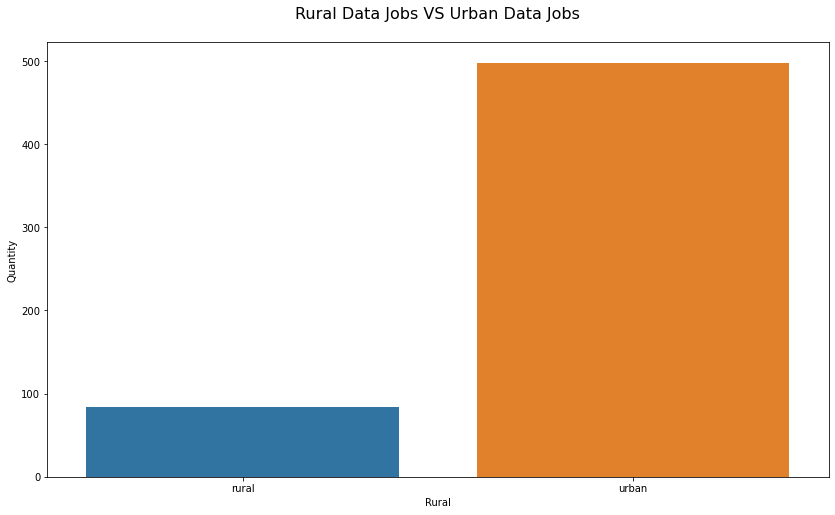

In [34]:
plt.figure(figsize = (14, 8))
chart = sns.barplot(data = figure_1, x = figure_1['Rural'], y = figure_1['Quantity'])
plt.title('Rural Data Jobs VS Urban Data Jobs' + '\n', fontsize = 16)

In [50]:
figure_2 = final_df.groupby('title').sum()
figure_2.reset_index(inplace = True)
figure_2.sort_values(by = 'Quantity', inplace = True, ascending = False)
top_jobs = figure_2.nlargest(10, ['Quantity'])

Text(0.5, 1.0, 'Rural Data Jobs VS Urban Data Jobs\n')

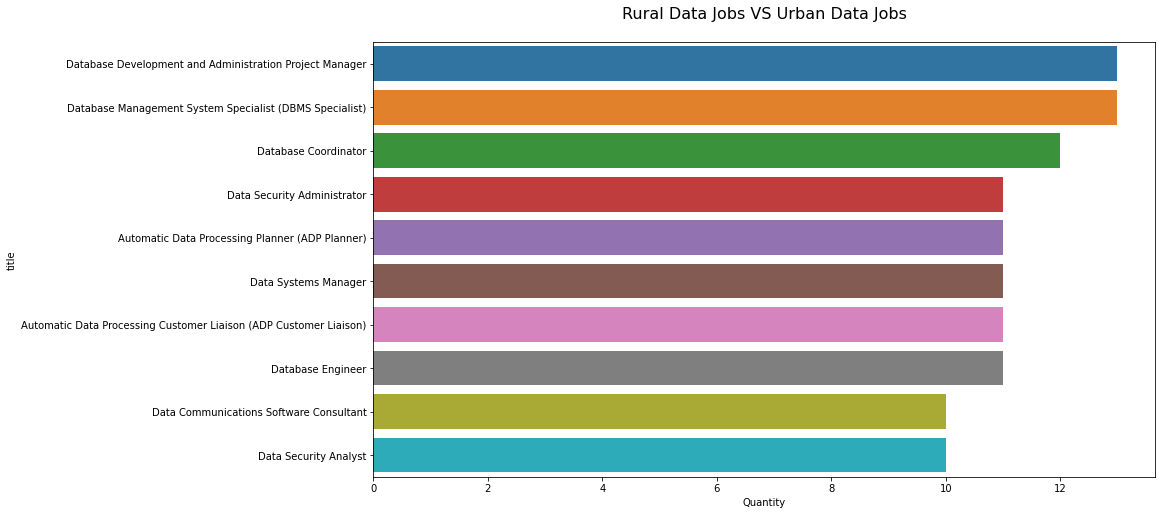

In [52]:
plt.figure(figsize = (14, 8))
chart = sns.barplot(data = top_jobs, x = top_jobs['Quantity'], y = top_jobs['title'])
plt.title('Rural Data Jobs VS Urban Data Jobs' + '\n', fontsize = 16)